In [2]:
# 📘 Fraud Detection Starter Notebook

# 👇 STEP 1: Load dataset
import pandas as pd
url = "https://raw.githubusercontent.com/Patrick0481/Data-science-for-business/refs/heads/main/fraud_detection_dataset.csv"
fraud_df = pd.read_csv(url)


In [3]:

# 👀 STEP 2: Preview data
fraud_df.head()



,Transaction_ID,Customer_ID,Account_Age_Months,Customer_Age,Gender,Marital_Status,Income_Level,Occupation,Device_Type,Is_Registered_Device,...,Velocity_Score,Device_OS,Card_Type,Card_Tier,Foreign_Transaction,Currency_Conversion_Rate,Customer_Segment,Loyalty_Status,Risk_Score,Is_Fraud
0,1,CUST10000,93,32,Other,Single,Low,Retired,Mobile,Yes,...,0.82,Linux,Debit,Basic,No,1.09,Retail,Bronze,0.23,0
1,2,CUST10001,135,38,Male,Divorced,High,Professional,POS_Terminal,Yes,...,0.72,Windows,Debit,Basic,No,1.08,Business,Silver,0.09,0
2,3,CUST10002,213,33,Female,Married,Low,Service,Desktop,Yes,...,1.14,Windows,Prepaid,Gold,No,1.02,Retail,Gold,0.57,1
3,4,CUST10003,219,52,Female,Divorced,Low,Student,Mobile,Yes,...,1.03,iOS,Debit,Platinum,No,1.13,Retail,Silver,0.23,0
4,5,CUST10004,108,61,Male,Single,Low,Student,Desktop,Yes,...,0.75,Android,Prepaid,Gold,No,1.11,Business,Gold,0.03,0


In [4]:
# 📏 STEP 3: Basic dataset info
fraud_df.info()
fraud_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                5000 non-null   int64  
 1   Customer_ID                   5000 non-null   object 
 2   Account_Age_Months            5000 non-null   int64  
 3   Customer_Age                  5000 non-null   int64  
 4   Gender                        5000 non-null   object 
 5   Marital_Status                5000 non-null   object 
 6   Income_Level                  5000 non-null   object 
 7   Occupation                    5000 non-null   object 
 8   Device_Type                   5000 non-null   object 
 9   Is_Registered_Device          5000 non-null   object 
 10  Transaction_Type              5000 non-null   object 
 11  Merchant_Category             5000 non-null   object 
 12  Location_Match                5000 non-null   object 
 13  Cou

,Transaction_ID,Account_Age_Months,Customer_Age,IP_Risk_Score,Amount,Num_Past_Transactions,Avg_Transaction_Amount_30d,Num_Failed_Login_24h,Transaction_Duration_Seconds,Velocity_Score,Currency_Conversion_Rate,Risk_Score,Is_Fraud
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,118.974600,45.430800,0.28633,97.189606,49.965000,74.778678,0.484400,148.669400,0.997904,1.099674,0.286968,0.039800
std,1443.520003,69.390888,16.281334,0.16268,98.692472,7.093253,20.490778,0.707288,86.134501,0.201888,0.050141,0.160526,0.195509
min,1.000000,1.000000,18.000000,0.00000,0.000000,24.000000,13.300000,0.000000,2.000000,0.300000,0.930000,0.000000,0.000000
25%,1250.750000,59.000000,31.000000,0.16000,28.470000,45.000000,60.805000,0.000000,75.000000,0.860000,1.070000,0.160000,0.000000
50%,2500.500000,118.500000,45.000000,0.26000,67.775000,50.000000,74.595000,0.000000,147.500000,1.000000,1.100000,0.270000,0.000000
75%,3750.250000,179.000000,59.000000,0.39000,131.827500,55.000000,88.622500,1.000000,224.000000,1.130000,1.130000,0.390000,0.000000
max,5000.000000,239.000000,74.000000,0.92000,971.610000,77.000000,147.450000,4.000000,299.000000,1.700000,1.300000,0.970000,1.000000


In [ ]:
# ✅ Prompt:- these are just to help you start with the case analysis.
# "What are the most common transaction types and device types among fraud cases?"
# "Which features show imbalance or potential data quality issues?"
# "Is there a significant difference in average amount between fraud and non-fraud transactions?"

In [5]:
# Check for missing values and duplicates
print(fraud_df.isnull().sum())
print(fraud_df.duplicated().sum())

Transaction_ID                  0
Customer_ID                     0
Account_Age_Months              0
Customer_Age                    0
Gender                          0
Marital_Status                  0
Income_Level                    0
Occupation                      0
Device_Type                     0
Is_Registered_Device            0
Transaction_Type                0
Merchant_Category               0
Location_Match                  0
Country_Match                   0
IP_Risk_Score                   0
Amount                          0
Time_of_Day                     0
Day_of_Week                     0
Is_Weekend                      0
Is_Holiday                      0
Num_Past_Transactions           0
Avg_Transaction_Amount_30d      0
Num_Failed_Login_24h            0
Past_Fraud_Flag                 0
Card_Swipe_Error                0
Transaction_Duration_Seconds    0
Velocity_Score                  0
Device_OS                       0
Card_Type                       0
Card_Tier     

In [6]:
# Summary stats
print(fraud_df.describe())

       Transaction_ID  Account_Age_Months  Customer_Age  IP_Risk_Score  \
count     5000.000000         5000.000000   5000.000000     5000.00000   
mean      2500.500000          118.974600     45.430800        0.28633   
std       1443.520003           69.390888     16.281334        0.16268   
min          1.000000            1.000000     18.000000        0.00000   
25%       1250.750000           59.000000     31.000000        0.16000   
50%       2500.500000          118.500000     45.000000        0.26000   
75%       3750.250000          179.000000     59.000000        0.39000   
max       5000.000000          239.000000     74.000000        0.92000   

            Amount  Num_Past_Transactions  Avg_Transaction_Amount_30d  \
count  5000.000000            5000.000000                 5000.000000   
mean     97.189606              49.965000                   74.778678   
std      98.692472               7.093253                   20.490778   
min       0.000000              24.000000

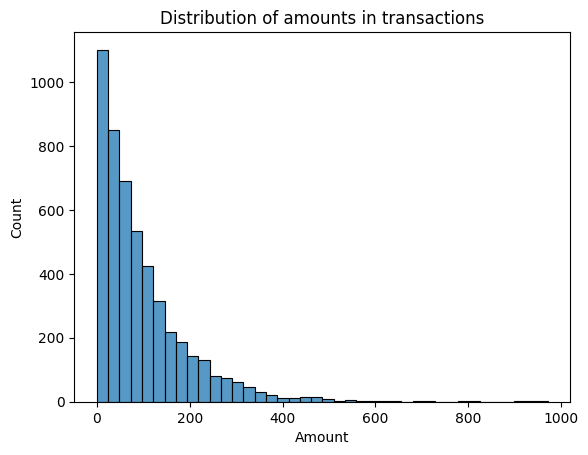

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of amounts in transactions
sns.histplot(fraud_df["Amount"], bins=40)
plt.title("Distribution of amounts in transactions")
plt.show()

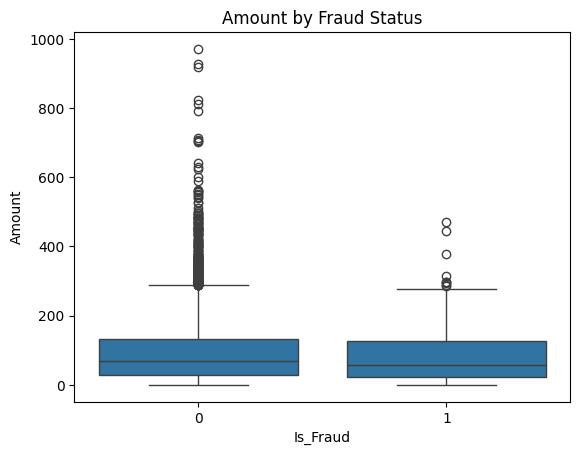

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of Amount by Fraud status
sns.boxplot(x="Is_Fraud", y="Amount", data=fraud_df)
plt.title("Amount by Fraud Status")
plt.show()

In [21]:
# Count of fraudulent vs legitimate transactions
print(fraud_df['Is_Fraud'].value_counts())

# Percentage of frauds
fraud_rate = fraud_df['Is_Fraud'].mean() * 100
print(f"Fraud rate: {fraud_rate:.2f}%")

# Explore averages for key features by fraud status
print(fraud_df.groupby('Is_Fraud')[['Amount', 'Customer_Age']].mean())

Is_Fraud
0    4801
1     199
Name: count, dtype: int64
Fraud rate: 3.98%
             Amount  Customer_Age
Is_Fraud                         
0         97.492037     45.431785
1         89.893266     45.407035


C:\Users\patri\AppData\Local\Temp\ipykernel_2596\685750241.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby(["Merchant_Category", "Amount_bin"])["Is_Fraud"]


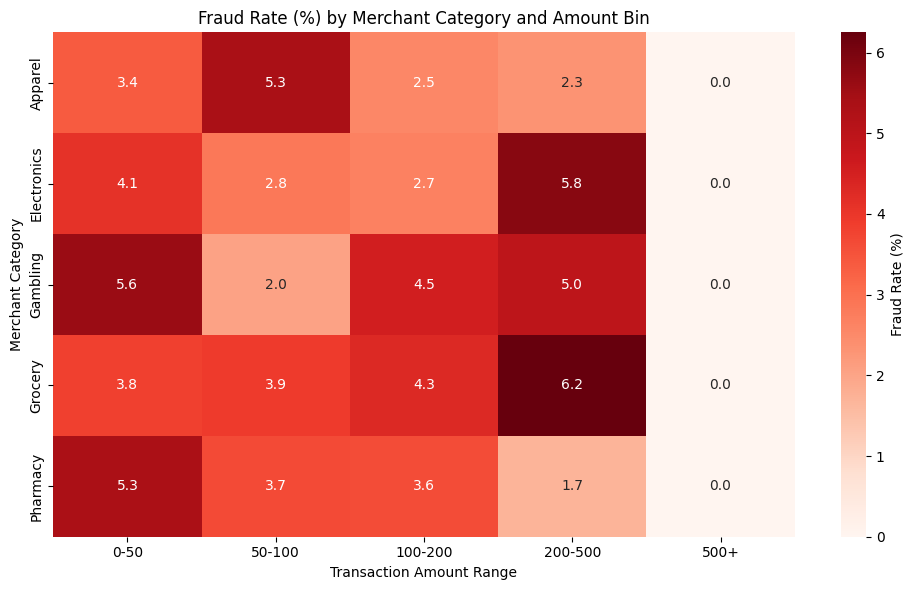

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Amount bins (use fraud_df, and cover amounts > 500)
fraud_df["Amount_bin"] = pd.cut(
	fraud_df["Amount"],
	bins=[0, 50, 100, 200, 500, float("inf")],
	labels=["0-50", "50-100", "100-200", "200-500" , "500+"], 
	include_lowest=True,
)

# Group by Merchant_Category and Amount_bin, compute fraud rate (%) using the actual fraud column 'Is_Fraud'
fraud_rate_combo = (
	fraud_df.groupby(["Merchant_Category", "Amount_bin"])["Is_Fraud"]
	.mean()
	.reset_index()
)

fraud_rate_combo["Is_Fraud"] = fraud_rate_combo["Is_Fraud"] * 100

# Pivot table for heatmap
pivot_table = fraud_rate_combo.pivot(
	index="Merchant_Category",
	columns="Amount_bin",
	values="Is_Fraud"
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Fraud Rate (%)'})
plt.title("Fraud Rate (%) by Merchant Category and Amount Bin")
plt.ylabel("Merchant Category")
plt.xlabel("Transaction Amount Range")
plt.tight_layout()
plt.show()

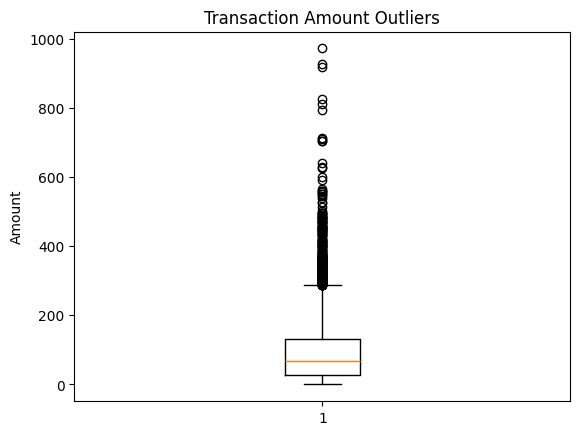

In [24]:
import matplotlib.pyplot as plt

# Boxplot for one feature
plt.boxplot(fraud_df['Amount'])
plt.title('Transaction Amount Outliers')
plt.ylabel('Amount')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target (y)
X = fraud_df.drop(columns=['Is_Fraud'])
y = fraud_df['Is_Fraud']

# One-hot encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Check precision and recall goals
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

[[1440    0]
 [  60    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1440
           1       0.00      0.00      0.00        60

    accuracy                           0.96      1500
   macro avg       0.48      0.50      0.49      1500
weighted avg       0.92      0.96      0.94      1500

Precision: 0.00, Recall: 0.00


C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas